# WBCD dataset: Degeneration effect - repeated avatarization 

In order to look at the effect of an avatarization, we repeat the avatarization on an avatar dataset with `k = 20`.  

This notebook visualize avatarization results of the WBCD dataset over iteration.  
To visualize the results, we display the FAMD projection in the original data space of avatars.

## Packages import 

In [2]:
# Main importation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import matplotlib.transforms as transforms
from matplotlib import patches, pyplot as plt
import saiph
import sys


## Data loading

In [3]:
df = pd.read_csv("../../datasets/WBCD/breast_cancer_wisconsin.csv")
df.drop(columns = "Sample_code_number", inplace = True)
df["iter"] = 0

df = df.astype("category")
df_list = [df]

In [4]:
df_all = pd.read_csv("../../datasets/messageD/wbcd.csv")

In [5]:
df_all.Class = df_all.Class.astype("object")

In [6]:
df_0 = df_all[df_all["iter"] == 0]  # original data
df_1 = df_all[df_all["iter"] == 1]
df_2 = df_all[df_all["iter"] == 2]
df_3 = df_all[df_all["iter"] == 3]
df_5 = df_all[df_all["iter"] == 5]
df_7 = df_all[df_all["iter"] == 7]
df_10 = df_all[df_all["iter"] == 10]

df_0.drop(columns = "iter", inplace = True)
df_1.drop(columns = "iter", inplace = True)
df_2.drop(columns = "iter", inplace = True)
df_3.drop(columns = "iter", inplace = True)
df_5.drop(columns = "iter", inplace = True)
df_7.drop(columns = "iter", inplace = True)
df_10.drop(columns = "iter", inplace = True)

/Users/julien/Library/Caches/pypoetry/virtualenvs/avatar-paper-igF8noez-py3.9/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Graphical parameters

In [7]:
colors = pd.read_csv("../../color.csv", index_col = 0)

## Multdimensionnal projection function.

This section use projection function (such as FAMD) to project the avatar data in the original data space.

In [8]:
def projection_plot(records_set, avatars_set, variable_visualization, iter, colors = colors, ax=None) :

    # perform projection
    __, mod, param = saiph.fit(records_set, nf = 2) 
    avat_coordinates = saiph.transform(avatars_set, mod, param) # project avatar in the original space 
    var1 = mod.explained_var_ratio[0] * 100
    var2 = mod.explained_var_ratio[1] * 100

    avat_coordinates["modality"] = avatars_set[variable_visualization].values

    # general set up 
    paper_rc = {"lines.markersize": 11}
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale = 2, rc = paper_rc)
    with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]

    ax1 = ax or plt.gca()
    # add scatterplot
    sns.scatterplot(
        x = "Dim. 1",
        y = "Dim. 2",
        data = avat_coordinates,
        hue = "modality",
        alpha = 1,
        size = 0.5,
        palette = [colors.loc["benign", "color"], colors.loc["malignant", "color"]],
        edgecolor = "#1D1D1B",
        ax= ax1
    )
    
    # setup x, y limits, labs and legend
    ax1.set_xlim(avat_coordinates["Dim. 1"].min() - 0.2, avat_coordinates["Dim. 1"].max() + 0.2)
    ax1.set_ylim(avat_coordinates["Dim. 2"].min() - 0.2, avat_coordinates["Dim. 2"].max() + 0.2)
    ax1.set_xlabel("Dim. 1 (" + str(round(var1, 2)) + "%)")
    ax1.set_ylabel("Dim. 2 (" + str(round(var2, 2)) + "%)")
    ax1.set(xlim = (-3, 7.5))
    ax1.set(ylim = (-2.2, 4.9))

    ax1.get_legend().remove()

    ax1.set_title("Iteration: {}".format(iter))
    return ax1

## Iterations vizualisation

Here we iterate the visualization over avatar generations.

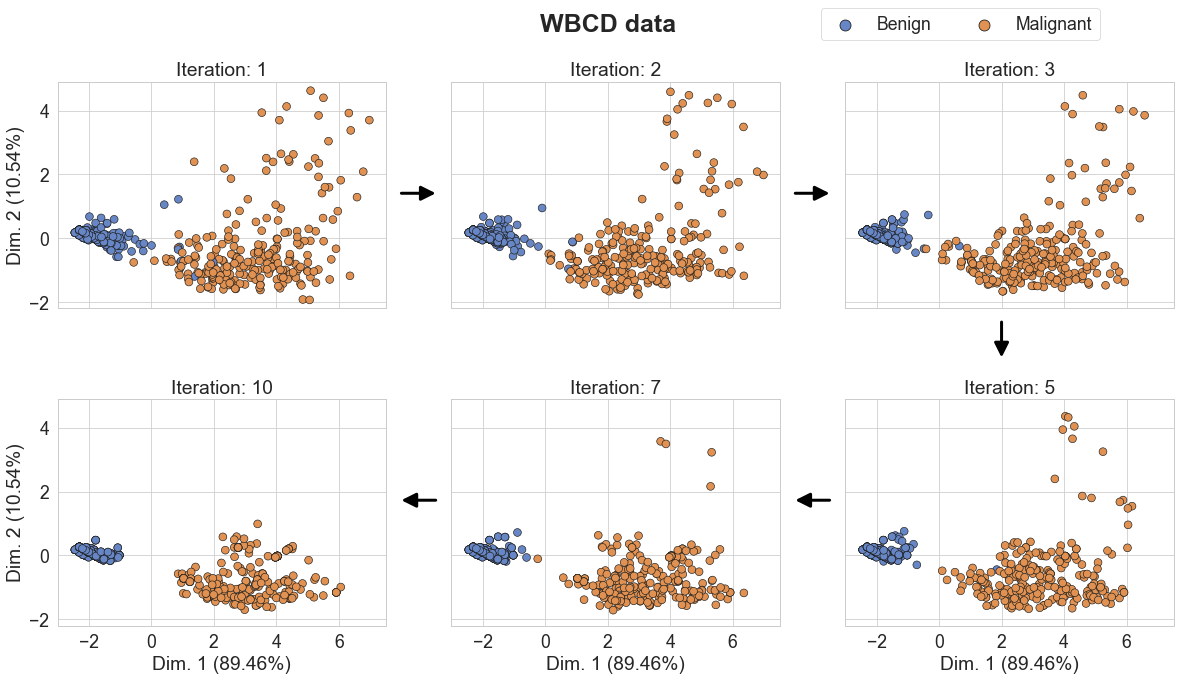

In [9]:
# Visualization context
paper_rc = {"lines.markersize": 11}
sns.set_style("whitegrid")
sns.set_context("paper", font_scale = 2, rc = paper_rc)
with plt.style.context("seaborn-whitegrid"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]
fig, axs = plt.subplots(2, 3, figsize = (20, 10))

# Link each avatar dataframe to the correct subpot
list = [(df_1, 1, axs[0, 0]),
        (df_2, 2, axs[0, 1]),
        (df_3, 3, axs[0, 2]),
        (df_5, 5, axs[1, 2]),
        (df_7, 7, axs[1, 1]),
        (df_10, 10, axs[1, 0])]

# Avatar projection in the original space
for df_temp in list:
    projection_plot(df_0, df_temp[0], "Class", df_temp[1], ax = df_temp[2])


## Add arrow from one subplot to the other
# get arrows position
axs_list = [ axs[0, 0],  axs[0, 1],  axs[0, 2],  axs[1, 2],  axs[1, 1],  axs[1, 0]]
xy_list = [([8, 1.7], [-3.5, 1.7]), ([8, 1.7], [-3.5, 1.7]), ([2, -2], [2, 5.5]), 
           ([-3.5, 1.4], [8, 1.4]), ([-3.5, 1.4], [8, 1.4])]

# Draw arrows
for i in range(len(axs_list)-1):
    xyA = xy_list[i][0]
    xyB = xy_list[i][1]
    
    axs_list[i].plot(*xyA)
    axs_list[i+1].plot(*xyB)

    transFigure = fig.transFigure.inverted()
    coord1 = transFigure.transform(axs_list[i].transData.transform(xyA))
    coord2 = transFigure.transform(axs_list[i+1].transData.transform(xyB))
    arrow = patches.FancyArrowPatch(
        coord1,  # posA
        coord2,  # posB
        shrinkA=0,  # so tail is exactly on posA (default shrink is 2)
        shrinkB=0,  # so head is exactly on posB (default shrink is 2)
        transform=fig.transFigure,
        color="black",
        arrowstyle="-|>",  # "normal" arrow
        mutation_scale=30,  # controls arrow head size
        linewidth=3,
    )
    fig.patches.append(arrow)

# Add space between each subplot
plt.subplots_adjust(hspace=0.4, wspace=0.2)

# put label outer the axis 
for ax in fig.get_axes():
    ax.label_outer()

# Add the legend
handles, _ = ax.get_legend_handles_labels()
for ha in handles:
    ha.set_edgecolor("#1D1D1B")
fig.legend(loc = (0.695, 0.94), labels = ["Benign", "Malignant"], handles = handles[:], ncol=2)

# General title
plt.gcf().text(0.46, 0.95, "WBCD data", fontsize=25, weight = 'bold', family = "sans-serif")

# Save figure if necessary
# plt.savefig("../../figure/wbcd_MESSAGED/wbcd_iterations.svg", format = "svg")

plt.show()


##  Perform standard deviation comparison

In [45]:
records_set = df_0
# perform projection
coord, model, param = saiph.fit(records_set, nf = 2) 
original_std = (coord["Dim. 1"].std(),  coord["Dim. 2"].std())

original_std1_mod = []
original_std2_mod = []

for modalities in records_set["Class"].unique():
    modality1_std = (coord[records_set["Class"] == 2]["Dim. 1"].std(),  coord[records_set["Class"] == 2]["Dim. 2"].std())
    modality2_std = (coord[records_set["Class"] == 4]["Dim. 1"].std(),  coord[records_set["Class"] == 4]["Dim. 2"].std())



standard_deviations = [
    original_std[0], 
    original_std[1],
    modality1_std[0], 
    modality1_std[1], 
    modality2_std[0], 
    modality2_std[1], ]
iterations = [0,0, 0,0,0,0]
modalities = ["all", "all", 2, 2, 4, 4]
dimensions = ["Dim. 1", "Dim. 2", "Dim. 1", "Dim. 2", "Dim. 1", "Dim. 2"]
percentages = [
    original_std[0]/original_std[0], 
    original_std[1]/original_std[1], 
     modality1_std[0]/modality1_std[0], 
     modality1_std[1]/modality1_std[1], 
     modality2_std[0]/modality2_std[0], 
     modality2_std[1]/modality2_std[1], 
     ]


for df, iteration, __ in list: 
    avat_coordinates = saiph.transform(df, model, param) # project avatar in the original space
    for dimension in ["Dim. 1", "Dim. 2"]:
        standard_deviation = avat_coordinates[dimension].std()
        standard_deviations.append(standard_deviation)
        iterations.append(iteration)
        modalities.append("all")
        dimensions.append(dimension)
        if dimension == "Dim. 1": 
            percentages.append(standard_deviation / original_std[0])
        elif dimension == "Dim. 2": 
            percentages.append(standard_deviation /  original_std[1])

        for modality in records_set["Class"].unique():
            standard_deviation = avat_coordinates[df["Class"] == modality][dimension].std()
            standard_deviations.append(standard_deviation)
            iterations.append(iteration)
            modalities.append(modality)
            dimensions.append(dimension)
            if dimension == "Dim. 1" and modality == 2: 
                percentages.append(standard_deviation / modality1_std[0])
            elif dimension == "Dim. 2" and modality == 2: 
                percentages.append(standard_deviation /  modality1_std[1])
            elif dimension == "Dim. 1" and modality == 4: 
                percentages.append(standard_deviation /  modality2_std[0])
            elif dimension == "Dim. 2" and modality == 4: 
                percentages.append(standard_deviation /  modality2_std[1])
results = pd.DataFrame(
    zip(percentages, standard_deviations, iterations, modalities, dimensions), 
    columns=["percentage", "standard_deviation", "iteration", "modality", "dimension"] 
    )

In [91]:
def compute_metrics(ref_df, df, results): 
    """Compute metrics of variablity variation between reference and avatarized Dataframe."""
    coord, model, param = saiph.fit(ref_df.drop(columns=["iteration", "repetition"]), nf = 2) 
    avat_coordinates = saiph.transform(df.drop(columns=["iteration", "repetition"]), model, param) # project avatar in the original space
    
    for dimension in ["Dim. 1", "Dim. 2"]:
        # All class
        standard_deviation = avat_coordinates[dimension].std()
        std_original = coord[dimension].std()
        raw = [standard_deviation/std_original, standard_deviation, df["iteration"].unique()[0], "all", dimension,  df["repetition"].unique()[0]]
        results.append(raw)

        # by class
        for type in (2, 4):
            standard_deviation = avat_coordinates[df["Class"] == type][dimension].std()
            std_original = coord[ref_df["Class"] == type][dimension].std()
            raw = [standard_deviation/std_original, standard_deviation, df["iteration"].unique()[0], type, dimension, df["repetition"].unique()[0]]
            results.append(raw)

    return results




In [92]:
dfs = pd.read_csv("../../datasets/WBCD/interations.csv")
dfs.drop(columns="Unnamed: 0", inplace=True)
dfs.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,iteration,repetition
0,5,1,1,1,2,1,3,1,1,2,0,0
1,5,4,4,5,7,10,3,2,1,2,0,0
2,3,1,1,1,2,2,3,1,1,2,0,0
3,6,8,8,1,3,4,3,7,1,2,0,0
4,4,1,1,3,2,1,3,1,1,2,0,0


In [144]:
dfs = pd.read_csv("../../datasets/WBCD/interations.csv")
dfs.head()
init = []
init = compute_metrics(
            dfs[dfs["iteration"] == 0],
            dfs[dfs["iteration"] == 0],
            results=init, 
            )

results = []
for iteration in range(1, 11): 
    for repetition in range(1,11): 
        subset = dfs[(dfs["iteration"] == iteration) & (dfs["repetition"] == repetition)]
        results = compute_metrics(
            dfs[dfs["iteration"] == 0],
            subset,
            results=results, 
        )


In [145]:
init


[[1.0, 2.603006288458452, 0, 'all', 'Dim. 1', 0],
 [1.0, 0.5935150454141445, 0, 2, 'Dim. 1', 0],
 [1.0, 1.4692060700557958, 0, 4, 'Dim. 1', 0],
 [1.0, 1.0005412671184106, 0, 'all', 'Dim. 2', 0],
 [1.0, 0.9613771749279344, 0, 2, 'Dim. 2', 0],
 [1.0, 1.0714229484919717, 0, 4, 'Dim. 2', 0]]

In [146]:
results[0:7]

[[0.4608013511430843, 1.1994688147555996, 1, 'all', 'Dim. 1', 1],
 [0.561517128696866, 0.3332688641393404, 1, 2, 'Dim. 1', 1],
 [0.6674382627451768, 0.9806043470127089, 1, 4, 'Dim. 1', 1],
 [0.9565880010909277, 0.9571057707217844, 1, 'all', 'Dim. 2', 1],
 [1.0004607097165326, 0.9618200907336762, 1, 2, 'Dim. 2', 1],
 [0.8838672276610698, 0.9469956311360482, 1, 4, 'Dim. 2', 1],
 [0.4595041582367018, 1.1960922134629424, 1, 'all', 'Dim. 1', 2]]

In [115]:
results = pd.DataFrame(results, columns=["percentage", "std", "iteration", "modality", "dimension", "repetition"])


ValueError: 6 columns passed, passed data had 1213 columns

Text(0.5, 0.98, 'Percentage of variability accross iterations for each modality')

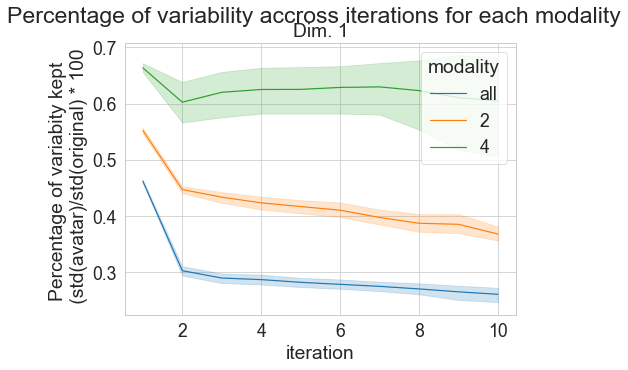

In [77]:

fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=results[results["dimension"] == "Dim. 1"], x="iteration", y="percentage", hue="modality")
ax.set(
    title='Dim. 1'
    )
ax.set_ylabel('Percentage of variabity kept \n (std(avatar)/std(original) * 100')
fig.suptitle('Percentage of variability accross iterations for each modality')

Text(0.5, 0.98, 'standard deviation accross iterations for each modality')

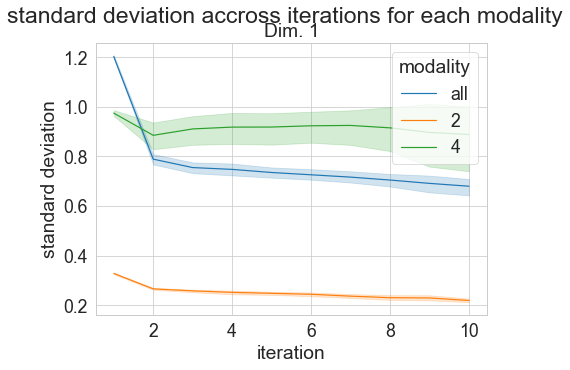

In [81]:

fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=results[results["dimension"] == "Dim. 1"], x="iteration", y="std", hue="modality")
ax.set(
    title='Dim. 1'
    )
ax.set_ylabel('standard deviation')
fig.suptitle('standard deviation accross iterations for each modality')



Text(0.5, 0.98, 'Percentage of variability accross iterations for each modality')

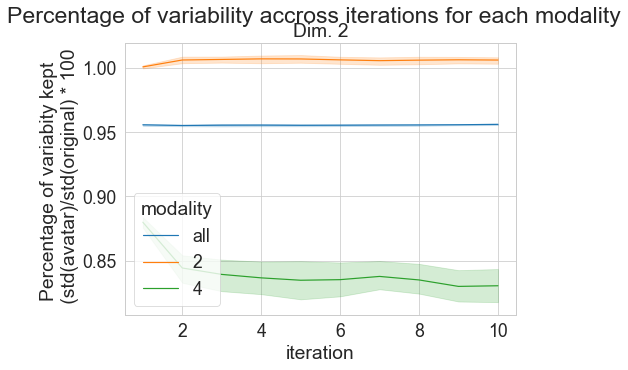

In [82]:
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=results[results["dimension"] == "Dim. 2"], x="iteration", y="percentage", hue="modality")
ax.set(
    title='Dim. 2'
    )
ax.set_ylabel('Percentage of variabity kept \n (std(avatar)/std(original) * 100')
fig.suptitle('Percentage of variability accross iterations for each modality')




Text(0.5, 0.98, 'standard deviation accross iterations for each modality')

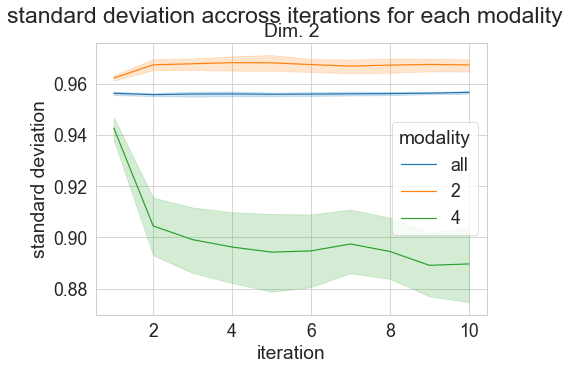

In [84]:
fig, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=results[results["dimension"] == "Dim. 2"], x="iteration", y="std", hue="modality")
ax.set(
    title='Dim. 2'
    )
ax.set_ylabel('standard deviation')
fig.suptitle('standard deviation accross iterations for each modality')




,Unnamed: 0,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class,iteration,repetition
0,0,5,1,1,1,2,1,3,1,1,2,0,0
1,1,5,4,4,5,7,10,3,2,1,2,0,0
2,2,3,1,1,1,2,2,3,1,1,2,0,0
3,3,6,8,8,1,3,4,3,7,1,2,0,0
4,4,4,1,1,3,2,1,3,1,1,2,0,0
